In [1]:
import itertools
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from random import randint
import random
import scipy.linalg as lg
import pandas as pd
import scipy.sparse as sparse
import scipy.sparse.linalg as lasp
import pymp
import networkx as nx

from mvc import thermal_overlap, FromGraphToHamiltonian

In [3]:
# vertex cover solver
class Vertex_Cover:
    
    def __init__(self, graph):
        self.graph = graph

    def validity_check(self, cover):
        is_valid = True
        for i in range(len(self.graph)):
            for j in range(i+1, len(self.graph[i])):
                if self.graph[i][j] == 1 and cover[i] != '1' and cover[j] != '1':
                    return False

        return is_valid

    def vertex_cover_naive(self):
        n = len(self.graph)
        minimum_vertex_cover = n
        a = list(itertools.product(*["01"] * n))
        for i in a:
            if Vertex_Cover.validity_check(self, i):
                counter = 0
                for value in i:
                    if value == '1':
                        counter += 1
                minimum_vertex_cover = min(counter, minimum_vertex_cover)

        return minimum_vertex_cover

def CalculateXc(A):
    ins = Vertex_Cover(A)
    
    return Vertex_Cover.vertex_cover_naive(ins)

In [ ]:
%%time
# number of nodes
N=12
# average degree
k=2
p=k/(N-1)
# inverse temperature
# with pymp.Parallel(6) as pp:
for beta in [3.5,4,4.5,5]:
        overlap=[]
        xc=[]
#     for beta in pp.range(5,10):
        for i in range(10000):
            graph=nx.gnp_random_graph(N, p=p)
            over=thermal_overlap(graph, beta)
            xc.append(over[0])
            overlap.append(over[1])
        bits=np.array([N]*10000)
        bet=np.array([beta]*10000)
        df=pd.DataFrame(data={'bits':bits, 'beta':bet, 
                              'xc': np.array(xc),
                              'overlap': np.array(overlap)})
        df=df[['bits','beta','xc','overlap']]
        
        with open('MVC_cooling.csv', 'a') as f:
            df.to_csv(f, header=False)

### Plot

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv('MVC_cooling.csv', names = ["iteration", "n_bits", "beta", "xc","overlap"])
data['density']=data.apply(lambda x: x.xc/x.n_bits, axis=1)
df=data.groupby(['n_bits','beta','density'])['overlap'].mean().reset_index()
df['std']=data.groupby(['n_bits','beta','density'])['overlap'].std().reset_index()['overlap']
df=df[df['n_bits']==12]

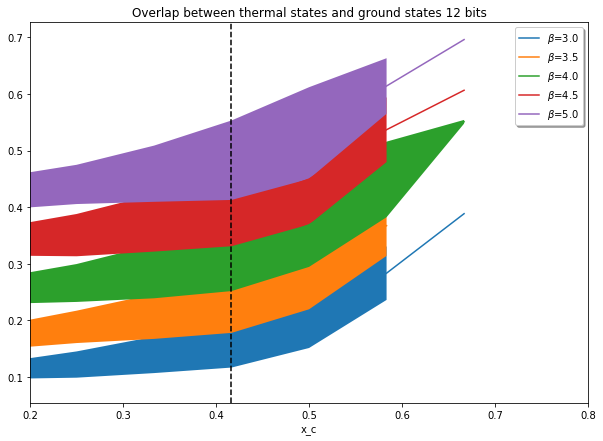

In [8]:
plt.figure(figsize=(10,7))
ax = plt.subplot(111)
for n in [3,3.5,4,4.5,5]:
    plt.plot(df[df['beta']==n]['density'],df[df['beta']==n]['overlap'], label=r'$\beta$=%.1f'%(n,))
    plt.fill_between(df[df['beta']==n]['density'], df[df['beta']==n]['overlap']-df[df['beta']==n]['std'], 
                    df[df['beta']==n]['overlap']+df[df['beta']==n]['std'])

leg = plt.legend(bbox_to_anchor=(1, 1), ncol=1, shadow=True, fancybox=True)

# leg.get_frame().set_alpha(0.5)
plt.title('Overlap between thermal states and ground states 12 bits')
plt.xlabel('x_c')
ax.axvline(0.416, color='k', linestyle='--')
# ax.axhline(0.5, color='k', linestyle='--')
# ax.set_xticks(np.delete(np.arange(0,1,0.1),2))
ax.set_xlim([0.2,0.8])
ax.set_xticks(list(ax.get_xticks()))
plt.savefig('MVC_12.pdf')

plt.show()

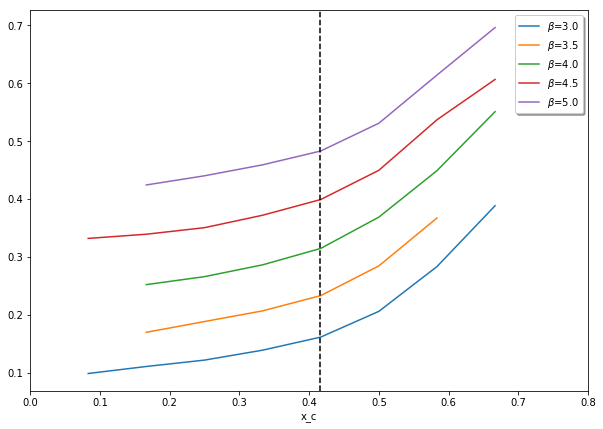

In [9]:
plt.figure(figsize=(10,7))
ax = plt.subplot(111)
for n in [3,3.5,4,4.5,5]:
# for n in range(1,9):
    plt.plot(df[df['beta']==n]['density'],df[df['beta']==n]['overlap'], label=r'$\beta$=%.1f'%(n,))
    

leg = plt.legend(bbox_to_anchor=(1, 1), ncol=1, shadow=True, fancybox=True)

# leg.get_frame().set_alpha(0.5)
# plt.title('Overlap between thermal states and ground states 12 bits')
plt.xlabel('x_c')
ax.axvline(0.416, color='k', linestyle='--')
# ax.axhline(0.5, color='k', linestyle='--')
# ax.set_xticks(np.delete(np.arange(0,1,0.1),2))
ax.set_xlim([0.0,0.8])
ax.set_xticks(list(ax.get_xticks()))
plt.savefig('MVC_12.pdf', transparent=True)

plt.show()

In [ ]:
for_hist=data[data['beta']==3]

In [ ]:
sns.distplot(for_hist['density'],hist=False )

In [ ]:
for_hist

In [ ]:
import itertools
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from random import randint
import random
import scipy.linalg as lg
import pandas as pd
import scipy.sparse as sparse
import scipy.sparse.linalg as lasp
import pymp
import networkx as nx

from mvc import thermal_overlap, FromGraphToHamiltonian, ground_state


# %%time
# number of nodes
N=20
# average degree
k=2
p=k/(N-1)
# inverse temperature
# with pymp.Parallel(6) as pp:
for beta in [3,3.5,4,4.5,5]:
    overlap=[]
    xc=[]
    for i in range(10000):
        graph=nx.gnp_random_graph(N, p=p)
        xc.append(ground_state(graph)[1])
        overlap.append(thermal_overlap(graph,beta))
    bits=np.array([N]*10000)
    bet=np.array([beta]*10000)
    df=pd.DataFrame(data={'bits':bits, 'beta':bet,'xc': np.array(xc),'overlap': np.array(overlap)})
    df=df[['bits','beta','xc','overlap']]
        
    with open('MVC_cooling.csv', 'a') as f:
        df.to_csv(f, header=False)
